In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, log_loss

Read the file containing the data 

In [18]:
data = pd.read_csv("adaptability_level_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


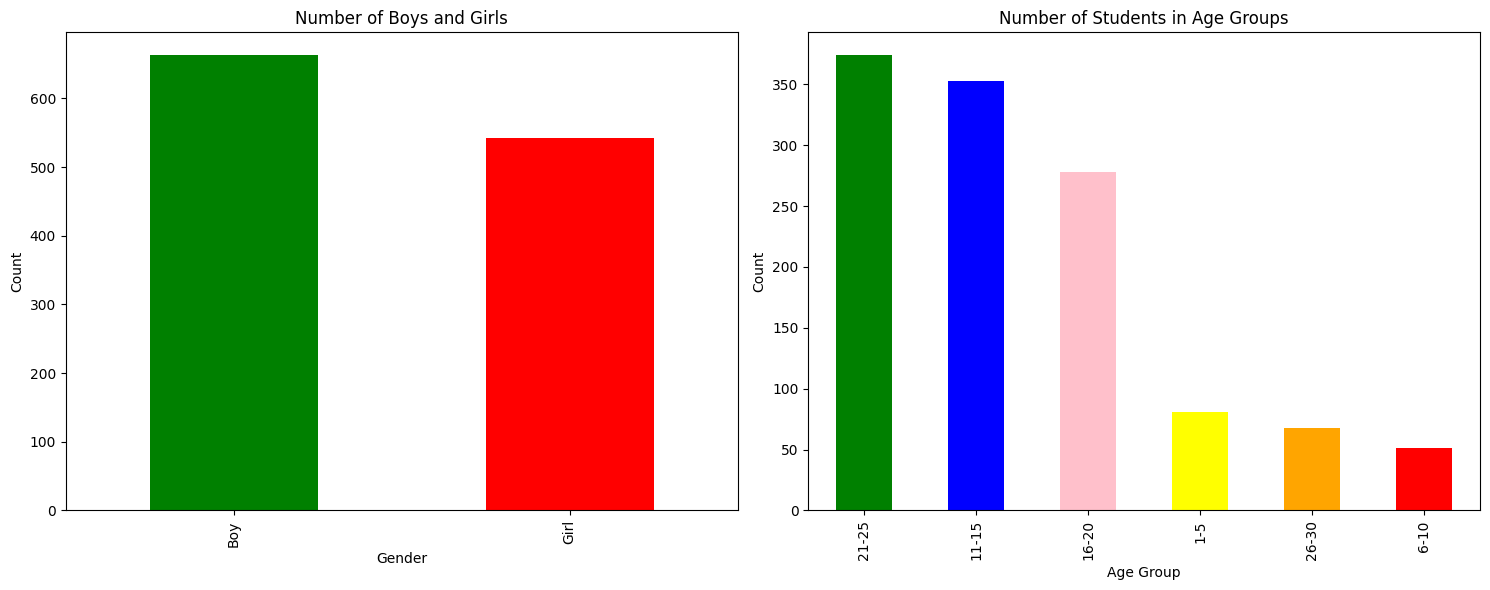

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
data['Gender'].value_counts().plot(kind='bar', color=['green', 'red'], ax=axes[0])
axes[0].set_title('Number of Boys and Girls')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

data['Age'].value_counts().plot(kind='bar', color=['green', 'blue', 'pink', 'yellow', 'orange', 'red'], ax=axes[1])
axes[1].set_title('Number of Students in Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

The data contains 1205 lines, with each line representing the information of one student. It includes 13 features (numbered 0-12) and one label, "Adaptivity Level" (number 13). These features are intended to assign the correct label to a student based on their characteristics (features). All data points are non-numerical, which means they need to be converted into numerical form.

First convert data type of each feature to string, so it's easier to process.

In [20]:
for column_name in data.columns:
    data[column_name] = data[column_name].astype(str)
print(data.head)

<bound method NDFrame.head of      Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \


Drop students in the age group 1-5, as they are too young to be considered proper students.

In [21]:
data = data[data["Age"] != '1-5']
print(f"Number of data points: {data["Age"].size}.")

Number of data points: 1124.


Identify all possible values for each feature and convert them into numerical format.

In [22]:
print(data['Gender'].unique())

['Boy' 'Girl']


In [23]:
data['Gender'] = data['Gender'].map({'Boy': 0, 'Girl': 1})

In [24]:
print(data['Age'].unique())

['21-25' '16-20' '11-15' '26-30' '6-10']


In [25]:
data['Age'] = data['Age'].map({'6-10': 0, '11-15': 1, '16-20': 2, '21-25': 3, '26-30': 4})